<a href="https://colab.research.google.com/github/mamarkevi/plotCoverage/blob/main/Stat_sing_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.contingency import odds_ratio

In [45]:
import scipy.stats as stats

# Dimentia among long-livers

**Mini-mental State Examination (MMSE)** -  is a set of 11 questions.


*   It's used by to check for cognitive impairment.
*   The test takes about 5 to 10 minutes.
*   The top score for the MMSE is 30 — a score of 25 or higher is said to be normal.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Stat_lab/dementia.csv')

In [8]:
data = data.drop('Unnamed: 0', axis=1)

In [9]:
data.head()

,sex,do you consume alcohol?,MMSE,dementia
0,male,not currently,29.0,0.0
1,male,not currently,14.0,1.0
2,male,not currently,28.0,0.0
3,female,not currently,27.0,0.0
4,female,not currently,18.0,1.0


In [18]:
data['do you consume alcohol?'].unique()

array(['not currently', 'yes'], dtype=object)

## How does often Dementia occur among long-livers?   

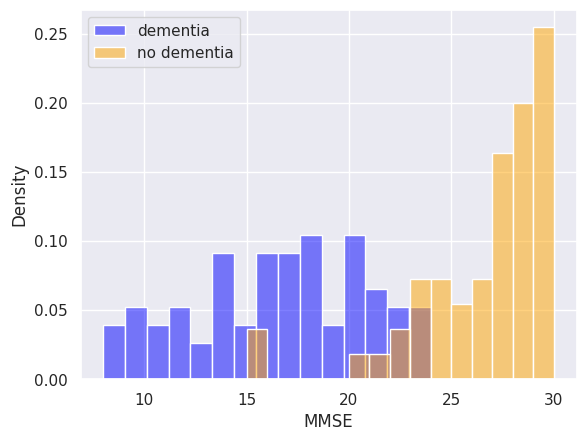

In [39]:
sns.histplot(data=data[data['dementia']==1]['MMSE'], color='blue', alpha=0.5, label='dementia',bins=15,stat='density')
sns.histplot(data=data[data['dementia']==0]['MMSE'], color='orange', alpha=0.5, label='no dementia',bins=15,stat='density')
plt.xlabel('MMSE')
plt.ylabel('Density')
plt.legend()

plt.show()

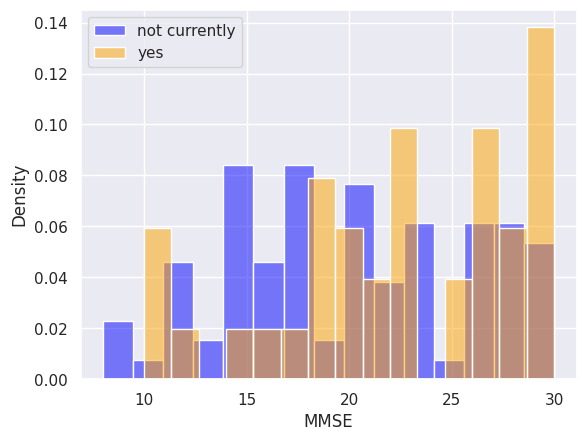

In [38]:
sns.histplot(data=data[data['do you consume alcohol?']=='not currently']['MMSE'], color='blue', alpha=0.5, label='not currently', bins=15,stat='density')
sns.histplot(data=data[data['do you consume alcohol?']=='yes']['MMSE'], color='orange', alpha=0.5, label='yes', bins=15,stat='density')
plt.xlabel('MMSE')
plt.ylabel('Density')
plt.legend()

plt.show()

## Let's to calculate the OR to prevent dementia with alcohol consumption :)

In [66]:
df = data[['do you consume alcohol?','dementia']]

In [72]:
df[df['do you consume alcohol?']=="yes"]['dementia'].value_counts()

,count
dementia,
0.0,20
1.0,18


In [73]:
df[df['do you consume alcohol?']=="not currently"]['dementia'].value_counts()

,count
dementia,
1.0,54
0.0,35


In [74]:
res = odds_ratio([[35, 54], [20, 18]])

In [44]:
res

OddsRatioResult(statistic=0.5858663227708626)